In [1]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:

"""

watch: 🎬 Lecture: Feature Selection and Engineering (Flex)


recom and concl are consistent with business problem. You can decide business problem at the 
end

baseline model with strongest correlated with salesprice(single lin regression)
-pearson correlation(heatmap), pairplots, 

2nd feature that correlation with price but not correlated with highest correlated

3rd feature with all values(use categorical values)

conclusion and final model and results(may be very redundant)

recommendations

limitations 

next steps
"""

Load data and preview

In [3]:
url = 'https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v2-5/main/data/kc_house_data.csv'
re = pd.read_csv(url)
re.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

We see that there are 2 columns with missing values let's just drop the rows with missing values. 

In [5]:
re = re.dropna()

In [6]:
re.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


we see the df is houses built between 1900-2022, that were sold in 2021 or 2022.

pull up correlation matrix to see what is correlated well with price

In [7]:
re.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034096,-0.007065,-0.012382,-0.028234,-0.119276,0.031941,-0.023340,-0.015077,-0.008044,-0.041644,0.023076,-0.028858,-0.000764,0.000638
price,-0.034096,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.538631,0.245005,0.263674,0.313789,0.095796,0.085023,0.063430,-0.022278
bedrooms,-0.007065,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.237957,0.318110,0.183660,0.145497,0.015369,0.108883,-0.106791
bathrooms,-0.012382,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.260684,0.456264,0.327982,0.443379,0.041574,-0.005481,0.017684
sqft_living,-0.028234,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.338387,0.510967,0.396530,0.291242,0.039089,0.102205,-0.087625
sqft_lot,-0.119276,0.086550,0.006215,0.038028,0.122271,1.000000,-0.031555,0.131756,0.004457,0.089318,0.154575,0.001897,0.009390,0.030041,-0.034408
floors,0.031941,0.180589,0.146871,0.404291,0.303911,-0.031555,1.000000,0.448245,-0.248466,0.132363,0.125016,0.544314,-0.025041,-0.218174,0.233589
sqft_above,-0.023340,0.538631,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,-0.067306,0.559972,0.312593,0.387253,0.011036,0.092317,-0.082722
sqft_basement,-0.015077,0.245005,0.237957,0.260684,0.338387,0.004457,-0.248466,-0.067306,1.000000,0.025766,0.210305,-0.230783,0.054032,0.059664,-0.045104
sqft_garage,-0.008044,0.263674,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,0.025766,1.000000,0.216512,0.447720,-0.098301,0.092092,-0.096639


pull up heatmap to see what is correlated well with price

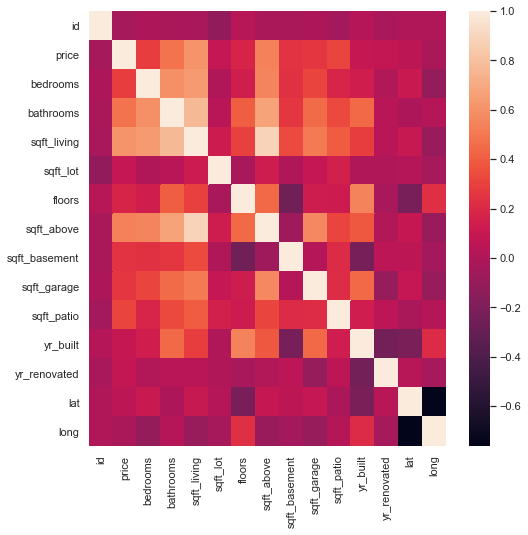

In [8]:
sns.set(rc={'figure.figsize':(8,8)})

sns.heatmap(re.corr());

we still cant get a great view so lets create a list of all the correlation values in the price column

In [9]:
re_corrs = re.corr()['price'].sort_values(ascending=False)
re_corrs

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

unsurprisingly price is 100% correlated with itself. lets create a basic regression model with the highest correlated value. We should keep in mind that this could also be a negative number(although in this case it clearly isn't). 

In [10]:
most_correlated = 'sqft_living'

### Plotting the Predictor vs. Price
We'll also create a scatter plot of this variable vs. price:

In [11]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR')

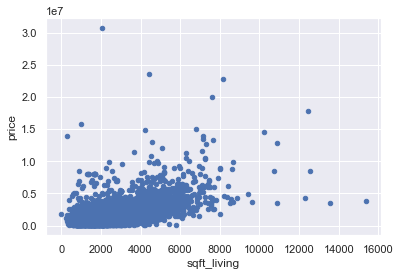

In [12]:
re.plot.scatter(x=most_correlated, y="price", figsize=(6,4));

There seems to be some sort of upward trend

In [13]:
y = re['price']
X_baseline = re[[most_correlated]]

In [14]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:32:42   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

Now we will calculate the baseline mean absolute error

In [15]:
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
print(f'Baseline Mae: {round(baseline_mae,2)}')

Baseline Mae: 396271.45


`sqft_living` was the attribute most strongly correlated with price, therefore our model is describing this relationship.

Overall this model is statistically significant and explains about 37% of the variance in price. IAlthough there is some significance to this number, there definitely is room to improve.
In a typical prediction, the model is off by around $396k. 

- The intercept is at about -\\$76000. This means that a house with 0 square feet of living area  would sell for -\$76k. It is fine that this value doesn't make sense as there is no such thing as a house that is 0 square feet. 
- The coefficient for sqft_living is about \\$560. This means for each additional square foot of living area, the house price increase by $560.

### Adding another factor
Lets see which categories are highly correlated with eachother to know not to use both, we will use .7 as our cutoff

In [16]:
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

hi_corr = re.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
hi_corr['pairs'] = list(zip(hi_corr.level_0, hi_corr.level_1))

# set index to pairs
hi_corr.set_index(['pairs'], inplace = True)

#drop level columns
hi_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
hi_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
hi_corr.drop_duplicates(inplace=True)
hi_corr[(hi_corr.cc>.7) & (hi_corr.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.883733
"(bathrooms, sqft_living)",0.772226
"(lat, long)",0.760532


It seems that we should either use long or lat, and probably better to only use one of: sqft_above, sqft_living, bathrooms, as there is hi multicollinearity between these values. Since sqft_living is the highest correlated with price we will stick with that. 

This makes sense as in general the more square feet a house has the more bathrooms and bedrooms it will have.

So we'll reload the correlations, and choose some that don't seem to be highly correlated with eachother

In [17]:
re_corrs

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

In [18]:
#re['recent_yr'] = re[['yr_built', 'yr_renovated']].max(axis=1)
#re.corr()['price'].map(abs).sort_values(ascending=False)

We will now create a new multiple regression model with the two factors that are highest correlated with price but not eachother.

In [19]:
X_2 = re[['sqft_living', 'sqft_patio']]

In [20]:
model2 = sm.OLS(y, sm.add_constant(X_2))
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     9096.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:32:45   Log-Likelihood:            -4.4832e+05
No. Observations:               30111   AIC:                         8.966e+05
Df Residuals:                   30108   BIC:                         8.967e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.756e+04   9751.046     -7.954      

In [21]:
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
print(f'Baseline Mae: {round(baseline_mae,2)}')

Baseline Mae: 396271.45


The next factor we added to the model was `sqft_patio` as it was the next attribute most strongly correlated with price, that wasn't correlated to highly with `sqft_living`. Therefore our model is describing the relationship between these two and price.

Overall the model is still statistically significant and is slightly better than the last as it explains about 37.7% of the variance in price. This number still isn't great, and could use some improvement. 

Additionally, all of the individual parts of the model are statistically significant.

- The model is still off by roughly the same amount as the last. Additionally the constant is roughly the same and the coefficient for `sqft_living` is roughly the same.
- The coefficient for `sqft_patio` is \\$314. This means for each additional square foot of patio area, the house price increases by \\$314.

In [22]:
# Lets make a new column by randomly multiplying 2 factors
#re['sqft_age'] = re['sqft_living']*re['age']

"""
I removed this as it was a worse predictor than age
"""

'\nI removed this as it was a worse predictor than age\n'

Lets add in another factor unrelated to the last two, in hopes of creating a better model. We will again pull up the correlation data.

In [23]:
re_corrs 

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

 Although, `bedrooms`, `sqft_garage`, `sqft_basement`, and `floors` are highly correlated, logically they are also correlated with `sqft_living`, as the bigger a house is the bigger/ more of these areas there will be. So we will look at `yr_built`; however, lets create a new column that tells us the age of the house when it was sold, to see if this does a better job.

In [24]:
re['year_sold'] = pd.DatetimeIndex(re['date']).year
re['age'] = re['year_sold'] - re['yr_built']

Now, we'll create models for both `age` and `yr_built` to see which has a higher r^2

In [25]:
X_3 = re[['sqft_living', 'sqft_patio', 'age']]

In [26]:
model3 = sm.OLS(y, sm.add_constant(X_3))
results3 = model3.fit()
print(f'R^2 Adj: {results3.rsquared_adj}')
print(f'P values:\n {results3.pvalues}')

R^2 Adj: 0.3844346885189156
P values:
 const          7.707535e-81
sqft_living    0.000000e+00
sqft_patio     1.021868e-71
age            5.220208e-85
dtype: float64


When we run the models for both, we see that the adjusted r squared is slightly higher, at .384, when including `age` as opposed to `yr_built`

## Categorical Factors

We will stick with our current model and move on to check out categorical values.

In [27]:
catCols = [col for col in re.columns if re[col].dtype=="O"]
catCols

['date',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'heat_source',
 'sewer_system',
 'address']

It is probably fair to assume that address doesn't have much of an affect on the price, and we already used date so lets check out other variables.

/Users/joshuaedelstein/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


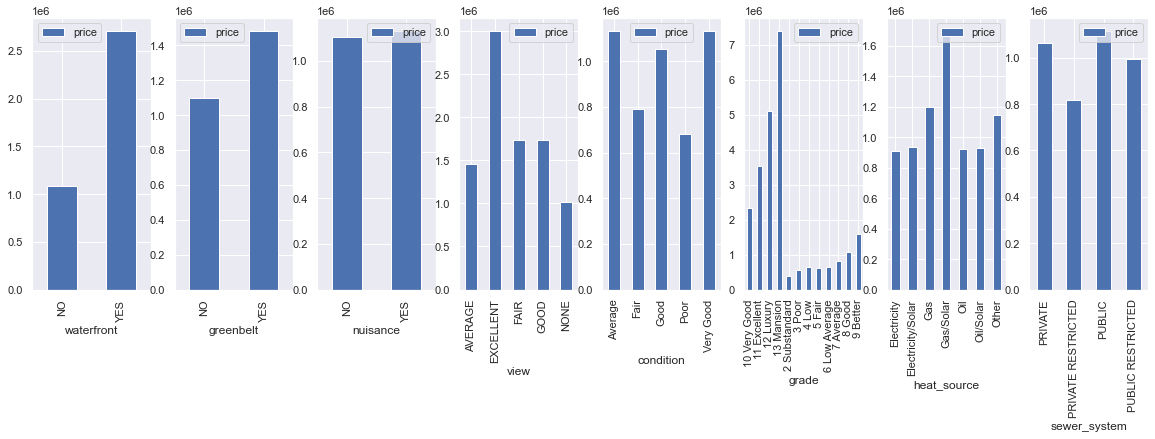

In [28]:
#HOW TO MAKE THIS LOOK CLEANER!!!???!?!?!?!

categorical_features = re.select_dtypes("object").columns
categorical_re = re.select_dtypes(include=['object'])
categorical_re.drop(columns=['date', 'address'], inplace = True)
categorical_features = np.array(categorical_re.columns)
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(20,5))

for index, feature in enumerate(categorical_features):
    re.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

Upon examining the graphs we find some useful information:

- Everything besides nuisance seems to be significant.
- Looking at the axis, `grade` seems to be the most significant, followed by `view` and `waterfront`.

So lets start with grade, and one hot encode new dummy values

In [58]:
iterated_X1 = re[['sqft_living', 'sqft_patio','age', 'grade']]
iterated_X1 = pd.get_dummies(iterated_X1, columns=['grade']) 
iterated_X1.head()

,sqft_living,sqft_patio,age,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1180,40,53,0,0,0,0,0,0,0,0,0,1,0,0
1,2770,240,71,0,0,0,0,0,0,0,0,0,1,0,0
2,2880,0,65,0,0,0,0,0,0,0,0,0,1,0,0
3,2160,270,11,0,0,0,0,0,0,0,0,0,0,0,1
4,1120,30,9,0,0,0,0,0,0,0,0,0,1,0,0


Since `grade_2Substandard` is the worst level, we will drop it, and use it as the baseline

In [59]:
iterated_X1.drop('grade_2 Substandard', axis=1, inplace=True)
iterated_X1.head()

,sqft_living,sqft_patio,age,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1180,40,53,0,0,0,0,0,0,0,0,1,0,0
1,2770,240,71,0,0,0,0,0,0,0,0,1,0,0
2,2880,0,65,0,0,0,0,0,0,0,0,1,0,0
3,2160,270,11,0,0,0,0,0,0,0,0,0,0,1
4,1120,30,9,0,0,0,0,0,0,0,0,1,0,0


In [60]:
iterated_model1 = sm.OLS(y, sm.add_constant(iterated_X1))
iterated_results1 = iterated_model1.fit()
print(iterated_results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     1996.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:58:49   Log-Likelihood:            -4.4555e+05
No. Observations:               30111   AIC:                         8.911e+05
Df Residuals:                   30096   BIC:                         8.912e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.593e+04   6

Our model as a whole is statistically significant, and the adjusted r squared has increased by roughly 10% to 48%. 

However, our constant as well as the vast majority of coefficients for grade are not statistically significant.

So let's try engineering a new feature that is only the higher level grades

In [49]:
re['high_grade'] = re['grade'].apply(lambda x: 'yes' if 
                                     x.__contains__('11') or
                                     x.__contains__('12') or
                                     x.__contains__('13')
                                     else 'no')

In [63]:
iterated_X2 = re[['sqft_living', 'sqft_patio','age', 'high_grade']]
iterated_X2 = pd.get_dummies(iterated_X2, columns=['high_grade'], drop_first=True) 
iterated_X2.head()

,sqft_living,sqft_patio,age,high_grade_yes
0,1180,40,53,0
1,2770,240,71,0
2,2880,0,65,0
3,2160,270,11,0
4,1120,30,9,0


In [65]:
iterated_model2 = sm.OLS(y, sm.add_constant(iterated_X2))
iterated_results2 = iterated_model2.fit()
print(f'R^2 Adj: {iterated_results2.rsquared_adj}')
print(f'P values:\n {iterated_results2.pvalues}')

R^2 Adj: 0.42920474535787667
P values:
 const             1.495450e-08
sqft_living       0.000000e+00
sqft_patio        5.588581e-60
age               8.425952e-73
high_grade_yes    0.000000e+00
dtype: float64


UP TO HERE

best r^2 so far and we also have significant pvals

In [ ]:
X = re[['sqft_living', 'sqft_patio', 'age', 'grade', 'view']]
X = pd.get_dummies(X, columns=['grade', 'view'], drop_first=True) 

In [ ]:
model4 = sm.OLS(y, sm.add_constant(X))
results4 = model4.fit()
results4.summary()

Now that is significantly better r2 although some of the predictors are not statistically significant. Lets try throwing in another

In [ ]:
y.hist(bins=200);

In [ ]:
y_log = np.log(y)
y_log.hist(bins=100);

In [ ]:
model45 = sm.OLS(y_log, sm.add_constant(X))
results45 = model45.fit()
results45.summary()

although this does make our data normal, the r has dropped significantly, and far more predictors are no longer significant

In [ ]:
numeric_df = re.select_dtypes(include='number')

In [ ]:
re_preds = numeric_df.drop('price', axis=1)
re_preds.head()

In [ ]:
ss =  StandardScaler()
ss.fit(re_preds)
re_preds_st_scaled = ss.transform(re_preds)
re_preds_st_scaled[:5, :]

In [ ]:
lr = LinearRegression ()
lr.fit(re_preds_st_scaled, y)
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.score(re_preds_st_scaled, y)#fix this tmrw as it doesnt match the above .510

In [ ]:
y_hat = lr.predict(re_preds_st_scaled)
y_hat

In [ ]:
X = re[['sqft_living', 'sqft_patio', 'yr_built', 'view']]
X = pd.get_dummies(X, columns=['view'], drop_first=True)

In [ ]:
model5 = sm.OLS(y, sm.add_constant(X))
results5 = model5.fit()
results5.summary()

So this model has a slighly lower adj r squared. But all the pvalues are now significant

In [ ]:
X = re[['sqft_living', 'sqft_patio', 'yr_built', 'view', 'nuisance']]
X = pd.get_dummies(X, columns=['view', 'nuisance'], drop_first=True)

In [ ]:
model6 = sm.OLS(y, sm.add_constant(X))
results6 = model6.fit()
print(results6.rsquared_adj)
print(results6.pvalues)

In [ ]:
variables = [re.sqft_living, re.sqft_patio, re.age]

plt.figure(figsize=(14,4))
i = 0
for x in variables:
    i = i+1
    plt.subplot(1,3,i)
    plt.hist(x,histtype='bar')
    x.hist();

In [ ]:
log_sqft_living = np.log(re.sqft_living)
log_sqft_patio = np.log(re.sqft_patio)
log_yr_built = np.log(re.age)

In [ ]:
re.grade.value_counts()

In [ ]:
criteria = {'1 Cabin': 'low', '2 Substandard': 'low', '3 Poor': 'low', '4 Low': 'low', 
            '5 Fair': 'fair', '6 Low Average': 'fair', '7 Average': 'fair', '8 Good': 'fair', 
            '9 Better': 'good', '10 Very Good': 'good', '11 Excellent': 'good', 
            '12 Luxury': 'good', '13 Mansion': 'good'}
re['grade_groups'] = re['grade'].map(criteria)

In [ ]:
X = re[['sqft_living', 'sqft_patio', 'yr_built', 'view', 'grade_groups']]
X = pd.get_dummies(X, columns=['view', 'grade_groups'], drop_first=True)

In [ ]:
model7 = sm.OLS(y, sm.add_constant(X))
results7 = model7.fit()
print(results7.rsquared_adj)
print(results7.pvalues)

this was not helpful

In [ ]:
y.hist(bins=50);

In [ ]:
log_y = np.log(y)

In [ ]:
log_y.hist(bins=50);

In [ ]:
X = re[['sqft_living', 'sqft_patio', 'yr_built', 'view', 'nuisance']]
X = pd.get_dummies(X, columns=['view', 'nuisance'], drop_first=True)

In [ ]:
model8 = sm.OLS(log_y, sm.add_constant(X))
results8 = model8.fit()
print(results8.summary())

r went down a bit, and a value is no longer stat significant. If u replace view with waterfront then all values are signif but r goes down to .401